Maria Navarro  
Health Care Analytics  
Spring 2024  
HW 2  
Topic: Insurance Market Data & Analytics

In [58]:
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt

**Question 1:** Finding a partner for a “private single-payer” proposal  
If in the future states want to move to a private quasi single payer model, which insurance company in each state is the best candidate to partner with?

In [59]:
# Read enrollment by counties
raw_enrollment_by_county = pd.read_csv('G:/My Drive/Spring 2024/Healthcare/Week2/CPSC_Enrollment_2024_01/CPSC_Enrollment_2024_01/CPSC_Enrollment_Info_2024_01.csv')

In [60]:
# Define a regular expression pattern
pattern = re.compile(r'[HRE]\d{4}')

# Use str.match to filter rows based on pattern
matches = raw_enrollment_by_county['Contract Number'].str.match(pattern, na=False)

# Filter the dataframe to include rows with matches and non-empty enrollment
enrollment_by_county = raw_enrollment_by_county[matches & (raw_enrollment_by_county['Enrollment'] != '*')]

In [61]:
enrollment_by_county

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment
107,E3014,801,3060,4013.0,AZ,Maricopa,156
110,E3014,801,3090,4019.0,AZ,Pima,72
111,E3014,801,3100,4021.0,AZ,Pinal,28
113,E3014,801,3120,4025.0,AZ,Yavapai,15
208,E3014,801,5200,6037.0,CA,Los Angeles,27
...,...,...,...,...,...,...,...
2670946,R7444,1,47090,50019.0,VT,Orleans,197
2670947,R7444,1,47100,50021.0,VT,Rutland,345
2670948,R7444,1,47110,50023.0,VT,Washington,182
2670949,R7444,1,47120,50025.0,VT,Windham,223


In [62]:
(enrollment_by_county['Enrollment']==" ").value_counts()

Enrollment
False    115613
Name: count, dtype: int64

In [63]:
# Read enrollment by plan
raw_enrollment_by_plan = pd.read_excel('G:/My Drive/Spring 2024/Healthcare/Week2/Monthly_Report_By_Plan_2024_01/Monthly_Report_By_Plan_2024_01/Monthly_Report_By_Plan_2024_01.xlsx', skiprows = 4)
raw_enrollment_by_plan.columns = raw_enrollment_by_plan.iloc[0]
raw_enrollment_by_plan = raw_enrollment_by_plan[1:].reset_index(drop=True)
#print(raw_enrollment_by_plan.columns)
raw_enrollment_by_plan.rename(columns={'Enrollment ': 'Enrollment_by_Plan'}, inplace=True) # be careful here. I noticed that the Enrollment column has a trailing space at the end

In [64]:
matches2 = raw_enrollment_by_plan['Contract Number'].str.match(pattern, na=False)
enrollment_by_plan = raw_enrollment_by_plan[matches2]
enrollment_by_plan

,Contract Number,Plan ID,Organization Type,Plan Type,Offers Part D,Organization Name,Organization Marketing Name,Plan Name,Parent Organization,Contract Effective Date,Enrollment_by_Plan
1,H0022,001,Demo,Medicare-Medicaid Plan HMO,Yes,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio,Buckeye Health Plan - MyCare Ohio (Medicare-Me...,Centene Corporation,2014-05-01 00:00:00,11346
2,H0028,007,Local CCP,HMO,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus SNP-DE H0028-007 (HMO D-SNP),Humana Inc.,2013-01-01 00:00:00,982
3,H0028,014,Local CCP,HMO,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus H0028-014 (HMO),Humana Inc.,2013-01-01 00:00:00,13552
4,H0028,015,Local CCP,HMOPOS,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus SNP-DE H0028-015 (HMO-POS D-SNP),Humana Inc.,2013-01-01 00:00:00,9116
5,H0028,016,Local CCP,HMOPOS,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus H0028-016 (HMO-POS),Humana Inc.,2013-01-01 00:00:00,1126
...,...,...,...,...,...,...,...,...,...,...,...
7290,R7315,801,Regional CCP,Regional PPO,Yes,HUMANA INSURANCE COMPANY,Humana,Humana Medicare Employer (Regional PPO),Humana Inc.,2018-01-01 00:00:00,117
7291,R7315,802,Regional CCP,Regional PPO,No,HUMANA INSURANCE COMPANY,Humana,Humana Medicare Employer (Regional PPO),Humana Inc.,2018-01-01 00:00:00,*
7292,R7444,001,Regional CCP,Regional PPO,Yes,CARE IMPROVEMENT PLUS SOUTH CENTRAL INSURANCE CO.,UnitedHealthcare,AARP Medicare Advantage from UHC NG-0001 (Regi...,"UnitedHealth Group, Inc.",2009-01-01 00:00:00,12436
7299,E3014,801,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830


In [65]:
# Read major insurance orgs document
orgs = pd.read_excel('G:/My Drive/Spring 2024/Healthcare/Week2/MajorInsuranceOrgs.xlsx')
orgs

,Organization Marketing Name,MajorInsuranceOrgName
0,Absolute Total Care,Absolute Total Care
1,Aetna Better Health of Ohio (HMO SNP),Aetna Health Inc.
2,"Aetna Better Health of Ohio, MyCare Ohio",Aetna Health Inc.
3,Aetna Better Health of Virginia,Aetna Health Inc.
4,Aetna Better Health Premier Plan,Aetna Health Inc.
...,...,...
431,VNSNY CHOICE Medicare,VNSNY CHOICE Medicare
432,Wabash Mem. Hospital,Wabash Mem. Hospital
433,WellCare,WellCare
434,West Virginia Senior Advantage (HMO SNP),West Virginia Senior Advantage (HMO SNP)


In [66]:
# Merge major insurance orgs with enrollment by plan
merged_df = pd.merge(enrollment_by_plan, orgs, on='Organization Marketing Name', how='left')
# keep it mind that merged_df has unique contract number and plan ID pairs
merged_df

,Contract Number,Plan ID,Organization Type,Plan Type,Offers Part D,Organization Name,Organization Marketing Name,Plan Name,Parent Organization,Contract Effective Date,Enrollment_by_Plan,MajorInsuranceOrgName
0,H0022,001,Demo,Medicare-Medicaid Plan HMO,Yes,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio,Buckeye Health Plan - MyCare Ohio (Medicare-Me...,Centene Corporation,2014-05-01 00:00:00,11346,Buckeye Health Plan - MyCare Ohio
1,H0028,007,Local CCP,HMO,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus SNP-DE H0028-007 (HMO D-SNP),Humana Inc.,2013-01-01 00:00:00,982,Humana
2,H0028,014,Local CCP,HMO,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus H0028-014 (HMO),Humana Inc.,2013-01-01 00:00:00,13552,Humana
3,H0028,015,Local CCP,HMOPOS,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus SNP-DE H0028-015 (HMO-POS D-SNP),Humana Inc.,2013-01-01 00:00:00,9116,Humana
4,H0028,016,Local CCP,HMOPOS,Yes,"CHA HMO, INC.",Humana,Humana Gold Plus H0028-016 (HMO-POS),Humana Inc.,2013-01-01 00:00:00,1126,Humana
...,...,...,...,...,...,...,...,...,...,...,...,...
7285,R7315,801,Regional CCP,Regional PPO,Yes,HUMANA INSURANCE COMPANY,Humana,Humana Medicare Employer (Regional PPO),Humana Inc.,2018-01-01 00:00:00,117,Humana
7286,R7315,802,Regional CCP,Regional PPO,No,HUMANA INSURANCE COMPANY,Humana,Humana Medicare Employer (Regional PPO),Humana Inc.,2018-01-01 00:00:00,*,Humana
7287,R7444,001,Regional CCP,Regional PPO,Yes,CARE IMPROVEMENT PLUS SOUTH CENTRAL INSURANCE CO.,UnitedHealthcare,AARP Medicare Advantage from UHC NG-0001 (Regi...,"UnitedHealth Group, Inc.",2009-01-01 00:00:00,12436,UnitedHealthcare
7288,E3014,801,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN


In [67]:
# Merge a second time with enrollment_by_county (not sure???)
merged_df2 = pd.merge(enrollment_by_county, merged_df, on=['Contract Number', 'Plan ID'], how='left', suffixes=('_1', '_2'))
merged_df2_sorted = merged_df2.sort_values(by=['State', 'County'])
#print(merged_df2['MajorInsuranceOrgName'].isnull().sum())
merged_df2_sorted['Enrollment'] = merged_df2_sorted['Enrollment'].astype(int)
merged_df2_sorted

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment,Organization Type,Plan Type,Offers Part D,Organization Name,Organization Marketing Name,Plan Name,Parent Organization,Contract Effective Date,Enrollment_by_Plan,MajorInsuranceOrgName
17768,H2001,816,2020,2020.0,AK,Anchorage,128,Local CCP,Local PPO,Yes,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",UnitedHealthcare,UnitedHealthcare Group Medicare Advantage (PPO),"UnitedHealth Group, Inc.",2005-08-01 00:00:00,633785,UnitedHealthcare
19781,H2001,817,2020,2020.0,AK,Anchorage,38,Local CCP,Local PPO,No,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",UnitedHealthcare,UnitedHealthcare Group Medicare Advantage (PPO),"UnitedHealth Group, Inc.",2005-08-01 00:00:00,508560,UnitedHealthcare
21879,H2001,827,2020,2020.0,AK,Anchorage,11,Local CCP,Local PPO,Yes,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",UnitedHealthcare,UnitedHealthcare Group Medicare Advantage (PPO),"UnitedHealth Group, Inc.",2005-08-01 00:00:00,17863,UnitedHealthcare
22269,H2001,828,2020,2020.0,AK,Anchorage,16,Local CCP,Local PPO,Yes,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",UnitedHealthcare,UnitedHealthcare Group Medicare Advantage (PPO),"UnitedHealth Group, Inc.",2005-08-01 00:00:00,5168,UnitedHealthcare
22520,H2001,837,2020,2020.0,AK,Anchorage,46,Local CCP,Local PPO,Yes,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",UnitedHealthcare,UnitedHealthcare Group Medicare Advantage (PPO),"UnitedHealth Group, Inc.",2005-08-01 00:00:00,303872,UnitedHealthcare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83362,H5522,803,3101,NaN,NaN,NaN,41,Local CCP,Local PPO,Yes,AETNA LIFE INSURANCE COMPANY,Aetna Medicare,Aetna Medicare Plan w/Rx (PPO),CVS Health Corporation,2006-01-01 00:00:00,485584,Aetna Health Inc.
88814,H5587,2,3101,NaN,NaN,NaN,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92489,H5843,1,3101,NaN,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102628,H8173,1,3101,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#merged_df2_sorted.to_csv('merged_df2_sorted.csv')

In [69]:
# Keeping just necessary columns ang aggregating to calculate the total enrollments by state and major org
final_df = merged_df2_sorted.groupby(['State', 'MajorInsuranceOrgName'])['Enrollment'].sum().reset_index()
final_df

,State,MajorInsuranceOrgName,Enrollment
0,AK,Aetna Health Inc.,995
1,AK,BlueCrossBlueShield,28
2,AK,Humana,80
3,AK,UnitedHealthcare,513
4,AL,Aetna Health Inc.,22008
...,...,...,...
274,WV,UnitedHealthcare,6945
275,WY,Aetna Health Inc.,855
276,WY,BlueCrossBlueShield,17
277,WY,Humana,316


In [14]:
#final_df.to_csv('final_df.csv')

In [70]:
# Calculating the totals by state
aggr_final_df = final_df.groupby('State')['Enrollment'].sum().reset_index()
# Renaming the total column
aggr_final_df.rename(columns={'Enrollment': 'Total Enrollment'}, inplace=True)
aggr_final_df

,State,Total Enrollment
0,AK,1616
1,AL,205913
2,AR,95738
3,AZ,166171
4,CA,1083413
5,CO,169974
6,CT,159394
7,DC,4864
8,DE,29408
9,FL,894515


In [71]:
# Merging results together
market_share = pd.merge(final_df, aggr_final_df, on='State', how='left')
market_share['Market_Share'] = market_share['Enrollment'] / market_share['Total Enrollment']
market_share

,State,MajorInsuranceOrgName,Enrollment,Total Enrollment,Market_Share
0,AK,Aetna Health Inc.,995,1616,0.615718
1,AK,BlueCrossBlueShield,28,1616,0.017327
2,AK,Humana,80,1616,0.049505
3,AK,UnitedHealthcare,513,1616,0.317450
4,AL,Aetna Health Inc.,22008,205913,0.106880
...,...,...,...,...,...
274,WV,UnitedHealthcare,6945,121502,0.057160
275,WY,Aetna Health Inc.,855,2790,0.306452
276,WY,BlueCrossBlueShield,17,2790,0.006093
277,WY,Humana,316,2790,0.113262


In [72]:
# Which is the company with the largest market share?
# Filter data to focus on specific states
states = ['AZ', 'GA', 'KY', 'NV', 'RI', 'TX', 'VT', 'WV', 'WI']
market_share = market_share[market_share['State'].isin(states)].copy()
market_share.rename(columns={'Total Enrollment': 'Total_State_Enrollment'}, inplace=True)
print(market_share.sort_values(by='Market_Share', ascending=False).reset_index(drop=True).head())
print()
print("The company with the highest market share is: ", market_share.sort_values(by='Market_Share', ascending=False).iloc[0,1])

  State MajorInsuranceOrgName  Enrollment  Total_State_Enrollment  \
0    WV                Humana      105060                  121502   
1    VT      UnitedHealthcare        4089                    6029   
2    KY                Humana      144169                  216091   
3    TX      UnitedHealthcare      319331                  568781   
4    GA                Humana      236859                  471944   

   Market_Share  
0      0.864677  
1      0.678222  
2      0.667168  
3      0.561430  
4      0.501879  

The company with the highest market share is:  Humana


In [73]:
# Calculating the HHI
'''
Below 1,500: Low concentration (competitive market).
1,500 to 2,500: Moderate concentration.
Above 2,500: High concentration (less competitive market).
'''
hhi_df = market_share[['State','Market_Share']].copy()
hhi_df['Market_Share'] = hhi_df['Market_Share']*100
hhi_df['Squared_market_share'] = hhi_df['Market_Share']**2
final_hhi = hhi_df.groupby('State')[['Squared_market_share']].sum()
final_hhi = final_hhi.rename(columns={'Squared_market_share': 'HHI'}).sort_values(by='HHI', ascending=False).reset_index()
final_hhi

,State,HHI
0,WV,7558.125523
1,KY,5218.797933
2,VT,5136.750027
3,TX,3870.426860
4,GA,3723.869298
5,WI,3588.469664
6,RI,3390.504166
7,AZ,3294.547556
8,NV,3069.372713


In [74]:
# Pick the top 4 states in terms of market concentration (highest HHIs)
print('These are the top 4 states with the highest market concentration')
print(final_hhi.head(4))

These are the top 4 states with the highest market concentration
  State          HHI
0    WV  7558.125523
1    KY  5218.797933
2    VT  5136.750027
3    TX  3870.426860


In [75]:
top_states = list(final_hhi.head(4)['State'])

# For top 4 states, print the company with the lion share and its market share
for state in top_states:
    print(state)
    top_state_info = market_share[market_share['State']==state].sort_values(by='Market_Share', ascending=False).head(1).reset_index(drop = True)
    company = top_state_info.iloc[0,1]
    lion_share = round(top_state_info.iloc[0,4],3)
    hhi = round(final_hhi[final_hhi['State']==state]['HHI'].iloc[0],3)
    print('State: {} - Company: {} - Lion Share: {} - HHI: {}'.format(state, company, lion_share, hhi) )

WV
State: WV - Company: Humana - Lion Share: 0.865 - HHI: 7558.126
KY
State: KY - Company: Humana - Lion Share: 0.667 - HHI: 5218.798
VT
State: VT - Company: UnitedHealthcare - Lion Share: 0.678 - HHI: 5136.75
TX
State: TX - Company: UnitedHealthcare - Lion Share: 0.561 - HHI: 3870.427


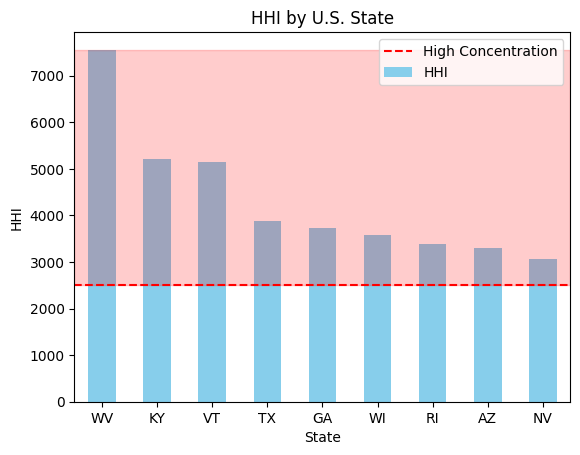

In [76]:
# Plot a bar graph
#ax = final_hhi['HHI'].plot(kind='bar', figsize=(15,8), color='skyblue')
ax = final_hhi.plot(x='State', y='HHI', kind='bar', color='skyblue')
# Plotting line to indicate high concentration threshold and coloring area above it to show states with high concentration (low competitive market)
ax.axhspan(ymin=2500, ymax=max(final_hhi['HHI']), color='red', alpha=0.2)
ax.axhline(y=2500, color='red', linestyle='--', label='High Concentration')
# Labeling graph
plt.title('HHI by U.S. State')
plt.xlabel('State')
plt.ylabel('HHI')
plt.xticks(rotation= 0)
plt.legend()
plt.show()

**Question 2:** Examining the insurance benefit packages

In [77]:
# List the top 5 major insurance companies in terms of market share
top_5_companies = market_share.sort_values(by='Market_Share', ascending=False).head(5)
print("These are the top 5 major insurance companies in terms of market share:")
print(top_5_companies)

These are the top 5 major insurance companies in terms of market share:
    State MajorInsuranceOrgName  Enrollment  Total_State_Enrollment  \
272    WV                Humana      105060                  121502   
257    VT      UnitedHealthcare        4089                    6029   
93     KY                Humana      144169                  216091   
241    TX      UnitedHealthcare      319331                  568781   
60     GA                Humana      236859                  471944   

     Market_Share  
272      0.864677  
257      0.678222  
93       0.667168  
241      0.561430  
60       0.501879  


In [78]:
# Read the dental file
file_path = 'G:/My Drive/Spring 2024/Healthcare/Week2/PBP_Benefits_2023/pbp_b16_dental.txt'
#file_path = 'G:/My Drive/Spring 2024/Healthcare/Week2/PBP_Benefits_2024/pbp_b16_dental.txt'
file_path = 'G:/My Drive/Spring 2024/Healthcare/Week2/dental_data_2024_2.csv'
#dental_benefits = pd.read_csv(file_path, sep='\t', header=0, encoding='latin1')
dental_benefits = pd.read_csv(file_path, sep=',', header=0, encoding='latin1')
#dental_benefits = pd.read_table(file_path, sep="\t", quotechar="\"", na_values=["", "NA"])
#dental_benefits['pbp_a_plan_identifier'] = dental_benefits['pbp_a_plan_identifier'].astype(int)
dental_benefits

C:\Users\mfncn\AppData\Local\Temp\ipykernel_51816\3547277840.py:6: DtypeWarning: Columns (39,44,49,112,117) have mixed types. Specify dtype option on import or set low_memory=False.
  dental_benefits = pd.read_csv(file_path, sep=',', header=0, encoding='latin1')


,pbp_a_hnumber,pbp_a_plan_identifier,segment_id,pbp_a_ben_cov,pbp_a_plan_type,orgtype,bid_id,version,pbp_b16a_bendesc_yn,pbp_b16a_bendesc_ehc,...,pbp_b16b_copay_amt_end_min,pbp_b16b_copay_amt_end_max,pbp_b16b_copay_amt_peri_min,pbp_b16b_copay_amt_peri_max,pbp_b16b_copay_amt_ext_min,pbp_b16b_copay_amt_ext_max,pbp_b16b_copay_amt_poo_min,pbp_b16b_copay_amt_poo_max,pbp_b16b_auth_yn,pbp_b16b_refer_yn
0,H0022,1.0,0.0,1.0,48.0,5.0,H0022_001_0,13.0,1.0,1111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,H0028,7.0,0.0,1.0,1.0,1.0,H0028_007_0,6.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,H0028,14.0,0.0,1.0,1.0,1.0,H0028_014_0,8.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,H0028,15.0,0.0,1.0,2.0,1.0,H0028_015_0,7.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,H0028,16.0,0.0,1.0,2.0,1.0,H0028_016_0,8.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,R7315,1.0,0.0,1.0,31.0,11.0,R7315_001_0,8.0,1.0,1111.0,...,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,1.0,2.0
7676,R7315,2.0,0.0,1.0,31.0,11.0,R7315_002_0,6.0,1.0,1111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
7677,R7315,801.0,0.0,1.0,31.0,11.0,R7315_801_0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
7678,R7315,802.0,0.0,1.0,31.0,11.0,R7315_802_0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [26]:
#with open(file_path, 'r', encoding='latin1') as file:
#    lines = file.readlines()

#problematic_line = lines[2532]  # Note: Python uses 0-based indexing
#print(problematic_line)

"H2960",9,0,1,1,1,"H2960_009_0",4,1,1110,2,2,1,3,NA,2,2,2,3,NA,NA,NA,NA,NA,NA,2,2,1,6,"INTRAORAL COMPLETE SERIES OR PANORAMIC RADIOGRAPHIC IMAGES: COVERED ONCE EVERY 3 CALENDAR YEARS",2,NA,NA,NA,NA,2,NA,NA,NA,"2",NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2,NA,2,NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2,2,1,1011111,NA,NA,NA,NA,NA,2,2,1,3,NA,2,2,1,6,"Amalgams or resin covered once per surface per tooth every 3 calendar years. Inlay, onlay or crowns covered once per tooth every 5 calendar years.",2,2,1,6,"ENDODONTIC THERAPY- ONCE PER TOOTH PER LIFETIME",2,2,1,6,"PERIODONTIC SERVICES- COVERED ONCE PER SITE PER QUADRANT EVERY 24 MONTHS. PERIODONTAL MAINTENANCE COVERED TWICE EVERY CALEANDAR YEAR.FULL MOUTH DEBRIDEMENT COVERED ONCE EVERY 3 CALENDAR YEARS	2	2	1	6	EXTRACTIONS- EXTRACTIONS COVERED ONCE IN A LIFETIME.	2	2	1	6	ORAL SURGERY SERVICES- INCLUDES SIMPLE AND COMPLICATED EXTRACTIONS.",1,NA,2,1500,"3",NA,2,NA,NA,NA,NA,1,10011111,NA,NA,NA,NA,0,0,"0",0,0,0,0,0,0,0,0,0,2,NA,1,1000000,40,40,NA,NA,N

In [79]:
# Find the index of the row with the lowest segment number for each contract and plan id pair
min_segment_index = dental_benefits.groupby(['pbp_a_hnumber', 'pbp_a_plan_identifier'])['segment_id'].idxmin()

# Use the index to filter the data and keep only the rows with the lowest segment number
filtered_dental_benefits = dental_benefits.loc[min_segment_index]

filtered_dental_benefits

,pbp_a_hnumber,pbp_a_plan_identifier,segment_id,pbp_a_ben_cov,pbp_a_plan_type,orgtype,bid_id,version,pbp_b16a_bendesc_yn,pbp_b16a_bendesc_ehc,...,pbp_b16b_copay_amt_end_min,pbp_b16b_copay_amt_end_max,pbp_b16b_copay_amt_peri_min,pbp_b16b_copay_amt_peri_max,pbp_b16b_copay_amt_ext_min,pbp_b16b_copay_amt_ext_max,pbp_b16b_copay_amt_poo_min,pbp_b16b_copay_amt_poo_max,pbp_b16b_auth_yn,pbp_b16b_refer_yn
0,H0022,1.0,0.0,1.0,48.0,5.0,H0022_001_0,13.0,1.0,1111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,H0028,7.0,0.0,1.0,1.0,1.0,H0028_007_0,6.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,H0028,14.0,0.0,1.0,1.0,1.0,H0028_014_0,8.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,H0028,15.0,0.0,1.0,2.0,1.0,H0028_015_0,7.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,H0028,16.0,0.0,1.0,2.0,1.0,H0028_016_0,8.0,1.0,1111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,R7315,1.0,0.0,1.0,31.0,11.0,R7315_001_0,8.0,1.0,1111.0,...,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,1.0,2.0
7676,R7315,2.0,0.0,1.0,31.0,11.0,R7315_002_0,6.0,1.0,1111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
7677,R7315,801.0,0.0,1.0,31.0,11.0,R7315_801_0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
7678,R7315,802.0,0.0,1.0,31.0,11.0,R7315_802_0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [47]:
#filtered_dental_benefits.to_csv('filtered_dental_benefits.csv')

In [80]:
# Looking for duplicates in merged_df2
duplicates_in_merged_df2 = merged_df2[merged_df2.duplicated(subset=['Contract Number', 'Plan ID'], keep=False)]

# Displaying duplicate rows in merged_df2
print("Duplicate Rows in merged_df2:")
duplicates_in_merged_df2

Duplicate Rows in merged_df2:


,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment,Organization Type,Plan Type,Offers Part D,Organization Name,Organization Marketing Name,Plan Name,Parent Organization,Contract Effective Date,Enrollment_by_Plan,MajorInsuranceOrgName
0,E3014,801,3060,4013.0,AZ,Maricopa,156,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN
1,E3014,801,3090,4019.0,AZ,Pima,72,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN
2,E3014,801,3100,4021.0,AZ,Pinal,28,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN
3,E3014,801,3120,4025.0,AZ,Yavapai,15,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN
4,E3014,801,5200,6037.0,CA,Los Angeles,27,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,PSERS Health Options Program (Employer PDP),Commonwealth of PA Pub Schools Retirement System,2007-01-01 00:00:00,92830,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115608,R7444,1,47090,50019.0,VT,Orleans,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115609,R7444,1,47100,50021.0,VT,Rutland,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115610,R7444,1,47110,50023.0,VT,Washington,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115611,R7444,1,47120,50025.0,VT,Windham,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Looking for duplicates in filtered_dental_benefits
duplicates_in_dental_benefits = filtered_dental_benefits[filtered_dental_benefits.duplicated(subset=['pbp_a_hnumber', 'pbp_a_plan_identifier'], keep=False)]

# Displaying duplicate rows in dental_benefits
print("\nDuplicate Rows in dental_benefits:")
duplicates_in_dental_benefits


Duplicate Rows in dental_benefits:


,pbp_a_hnumber,pbp_a_plan_identifier,segment_id,pbp_a_ben_cov,pbp_a_plan_type,orgtype,bid_id,version,pbp_b16a_bendesc_yn,pbp_b16a_bendesc_ehc,...,pbp_b16b_copay_amt_end_min,pbp_b16b_copay_amt_end_max,pbp_b16b_copay_amt_peri_min,pbp_b16b_copay_amt_peri_max,pbp_b16b_copay_amt_ext_min,pbp_b16b_copay_amt_ext_max,pbp_b16b_copay_amt_poo_min,pbp_b16b_copay_amt_poo_max,pbp_b16b_auth_yn,pbp_b16b_refer_yn


In [82]:
# Link the dental benefit database with the enrollment database on both Contract Number and Plan ID
enrollment_n_dental = pd.merge(merged_df2, filtered_dental_benefits, left_on = ('Contract Number', 'Plan ID'), right_on = ('pbp_a_hnumber', 'pbp_a_plan_identifier') , how='left')
enrollment_n_dental

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment,Organization Type,Plan Type,Offers Part D,...,pbp_b16b_copay_amt_end_min,pbp_b16b_copay_amt_end_max,pbp_b16b_copay_amt_peri_min,pbp_b16b_copay_amt_peri_max,pbp_b16b_copay_amt_ext_min,pbp_b16b_copay_amt_ext_max,pbp_b16b_copay_amt_poo_min,pbp_b16b_copay_amt_poo_max,pbp_b16b_auth_yn,pbp_b16b_refer_yn
0,E3014,801,3060,4013.0,AZ,Maricopa,156,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E3014,801,3090,4019.0,AZ,Pima,72,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E3014,801,3100,4021.0,AZ,Pinal,28,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E3014,801,3120,4025.0,AZ,Yavapai,15,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E3014,801,5200,6037.0,CA,Los Angeles,27,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115608,R7444,1,47090,50019.0,VT,Orleans,197,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
115609,R7444,1,47100,50021.0,VT,Rutland,345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
115610,R7444,1,47110,50023.0,VT,Washington,182,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
115611,R7444,1,47120,50025.0,VT,Windham,223,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [83]:
top_5_companies = market_share.sort_values(by='Market_Share', ascending=False).head(5)
top_5_companies = list(zip(top_5_companies['State'], top_5_companies['MajorInsuranceOrgName']))
top_5_companies

[('WV', 'Humana'),
 ('VT', 'UnitedHealthcare'),
 ('KY', 'Humana'),
 ('TX', 'UnitedHealthcare'),
 ('GA', 'Humana')]

In [84]:
# What percentage of the enrollees enjoy the "Preventive Dental Items as a supplemental benefit under Part C"?
# pbp_b16a_bendesc_yn = Does the plan provide Preventive Dental Items as a supplemental benefit under Part C? 1 = Yes, 2 = No
print("This is the percentage of enrollees with Preventive Dental Items as a supplemental benefit under Part C for the top 5 companies:")
for i in range(len(top_5_companies)):
    df = enrollment_n_dental[(enrollment_n_dental['State']==top_5_companies[i][0]) & (enrollment_n_dental['MajorInsuranceOrgName']==top_5_companies[i][1])]
    total_enrollees = df['Enrollment'].astype(int).sum()
    benefited_enrollees = len(df[df['pbp_b16a_bendesc_yn'] == 1])
    perc_preventive_dental = (benefited_enrollees /  total_enrollees) * 100
    print('State: {} - Company: {} - Percentage of enrollees: {}%'.format(top_5_companies[i][0], top_5_companies[i][1], round(perc_preventive_dental, 3)))

This is the percentage of enrollees with Preventive Dental Items as a supplemental benefit under Part C for the top 5 companies:
State: WV - Company: Humana - Percentage of enrollees: 0.456%
State: VT - Company: UnitedHealthcare - Percentage of enrollees: 0.0%
State: KY - Company: Humana - Percentage of enrollees: 0.574%
State: TX - Company: UnitedHealthcare - Percentage of enrollees: 0.001%
State: GA - Company: Humana - Percentage of enrollees: 0.61%


In [85]:
# What percentages of the enrollees enjoy the “Comprehensive Dental Items as a supplemental benefit under Part C”?
# pbp_b16b_bendesc_yn = Does the plan provide Comprehensive Dental Items as a supplemental benefit under Part C? 1 = Yes, 2 = No
print("This is the percentage of enrollees with Comprehensive Dental Items as a supplemental benefit under Part C for the top 5 companies:")
for i in range(len(top_5_companies)):
    df = enrollment_n_dental[(enrollment_n_dental['State']==top_5_companies[i][0]) & (enrollment_n_dental['MajorInsuranceOrgName']==top_5_companies[i][1])]
    total_enrollees = df['Enrollment'].astype(int).sum()
    benefited_enrollees = len(df[df['pbp_b16b_bendesc_yn'] == 1])
    perc_preventive_dental = (benefited_enrollees /  total_enrollees) * 100
    print('State: {} - Company: {} - Percentage of enrollees: {}%'.format(top_5_companies[i][0], top_5_companies[i][1], round(perc_preventive_dental, 3)))

This is the percentage of enrollees with Comprehensive Dental Items as a supplemental benefit under Part C for the top 5 companies:
State: WV - Company: Humana - Percentage of enrollees: 0.456%
State: VT - Company: UnitedHealthcare - Percentage of enrollees: 0.0%
State: KY - Company: Humana - Percentage of enrollees: 0.574%
State: TX - Company: UnitedHealthcare - Percentage of enrollees: 0.001%
State: GA - Company: Humana - Percentage of enrollees: 0.61%


**Question 3:** Quality of care and performance of insurance plans

In [86]:
# Find the top 10 biggest market share insurance ompanies in each state
market_share_sorted = market_share.sort_values(by = ['State', 'Market_Share'], ascending = [True, False])
top_10_companies_per_state = market_share_sorted.groupby('State').head(10).reset_index(drop=True)
list_top10 = list(zip(top_10_companies_per_state['State'], top_10_companies_per_state['MajorInsuranceOrgName']))
list_top10
top_10_companies_per_state

,State,MajorInsuranceOrgName,Enrollment,Total_State_Enrollment,Market_Share
0,AZ,UnitedHealthcare,73075,166171,0.439758
1,AZ,Humana,47129,166171,0.283617
2,AZ,Aetna Health Inc.,38499,166171,0.231683
3,AZ,BlueCrossBlueShield,7341,166171,0.044177
4,AZ,Kaiser,70,166171,0.000421
5,AZ,Priority Health Medicare,46,166171,0.000277
6,AZ,"Excellus Health Plan, Inc",11,166171,0.000066
7,GA,Humana,236859,471944,0.501879
8,GA,UnitedHealthcare,153503,471944,0.325257
9,GA,Aetna Health Inc.,52301,471944,0.110820


In [87]:
# Read the hedis measure excel tab and filter to multiple prescribers indicator key
hedis_measure = pd.read_excel('G:/My Drive/Spring 2024/Healthcare/Week2/HEDIS2023PUF_MA/HEDIS2023.xlsx', sheet_name = 'hedis_measures')
hedis_measure = hedis_measure[hedis_measure['IndicatorKey'].astype(str) == "202529_10"].reset_index(drop = True).sort_values(by = 'CMSContractNumber')
hedis_measure

,CMSContractNumber,MeasureCode,IndicatorKey,Rate,Lcl,Ucl
0,H0028,UOP,202529_10,12.35,12.04,12.67
1,H0034,UOP,202529_10,80.00,65.78,90.06
2,H0062,UOP,202529_10,4.62,1.32,11.81
3,H0074,UOP,202529_10,14.81,9.08,22.41
4,H0088,UOP,202529_10,NaN,NaN,NaN
...,...,...,...,...,...,...
623,R6694,UOP,202529_10,13.68,9.36,19.11
624,R6801,UOP,202529_10,7.40,6.99,7.84
625,R7220,UOP,202529_10,13.46,10.08,17.47
626,R7315,UOP,202529_10,11.65,9.30,14.36


In [88]:
# Merging dataframe with top 10 companies per state with merged_df_2_sorted to incorporate the contract information
desired_columns = ['State', 'MajorInsuranceOrgName', 'Enrollment_x', 'Total_State_Enrollment', 'Market_Share', 'Contract Number']#, 'Plan ID']
top10_contracts_merged = pd.merge(top_10_companies_per_state, merged_df2_sorted, how = 'left', on = ['State', 'MajorInsuranceOrgName'])[desired_columns]
# Dropping duplicates because the same contract number can have different plan IDs
top10_contracts_merged.drop_duplicates(inplace=True)
top10_contracts_merged.reset_index(drop=True, inplace=True)
top10_contracts_merged.rename(columns={'Enrollment_x': 'Company_Enrollment'}, inplace=True)
top10_contracts_merged
# this dataframe has 45 unique contract numbers and 114 rows in total

,State,MajorInsuranceOrgName,Company_Enrollment,Total_State_Enrollment,Market_Share,Contract Number
0,AZ,UnitedHealthcare,73075,166171,0.439758,H0609
1,AZ,UnitedHealthcare,73075,166171,0.439758,H2001
2,AZ,UnitedHealthcare,73075,166171,0.439758,H1537
3,AZ,Humana,47129,166171,0.283617,H5216
4,AZ,Humana,47129,166171,0.283617,H7617
...,...,...,...,...,...,...
109,WV,Aetna Health Inc.,8424,121502,0.069332,H5521
110,WV,Aetna Health Inc.,8424,121502,0.069332,H1608
111,WV,UnitedHealthcare,6945,121502,0.057160,H2001
112,WV,BlueCrossBlueShield,1029,121502,0.008469,H4036


In [89]:
# Now we need to merge resulting df with hedis measure df
top10_contracts_hedis = pd.merge(top10_contracts_merged, hedis_measure, how = 'left', left_on='Contract Number', right_on='CMSContractNumber')
top10_contracts_hedis

,State,MajorInsuranceOrgName,Company_Enrollment,Total_State_Enrollment,Market_Share,Contract Number,CMSContractNumber,MeasureCode,IndicatorKey,Rate,Lcl,Ucl
0,AZ,UnitedHealthcare,73075,166171,0.439758,H0609,H0609,UOP,202529_10,15.25,14.85,15.66
1,AZ,UnitedHealthcare,73075,166171,0.439758,H2001,H2001,UOP,202529_10,11.55,11.33,11.77
2,AZ,UnitedHealthcare,73075,166171,0.439758,H1537,H1537,UOP,202529_10,11.24,7.14,16.66
3,AZ,Humana,47129,166171,0.283617,H5216,H5216,UOP,202529_10,11.10,10.96,11.24
4,AZ,Humana,47129,166171,0.283617,H7617,H7617,UOP,202529_10,8.70,6.94,10.75
...,...,...,...,...,...,...,...,...,...,...,...,...
109,WV,Aetna Health Inc.,8424,121502,0.069332,H5521,H5521,UOP,202529_10,11.72,11.50,11.94
110,WV,Aetna Health Inc.,8424,121502,0.069332,H1608,H1608,UOP,202529_10,8.24,7.77,8.73
111,WV,UnitedHealthcare,6945,121502,0.057160,H2001,H2001,UOP,202529_10,11.55,11.33,11.77
112,WV,BlueCrossBlueShield,1029,121502,0.008469,H4036,H4036,UOP,202529_10,11.91,11.30,12.55


In [90]:
# Calculate the enrollment for each contract in each state
#enrollment_by_state_n_contract = merged_df2_sorted.groupby(['State','Contract Number', 'MajorInsuranceOrgName'])['Enrollment_by_Plan'].sum().reset_index(drop=False)
enrollment_by_state_n_contract = merged_df2_sorted.groupby(['State', 'Contract Number', 'MajorInsuranceOrgName'])['Enrollment'].sum().reset_index(drop=False)
enrollment_by_state_n_contract.rename(columns={'Enrollment': 'Enrollment_by_State_Contract'}, inplace=True)
enrollment_by_state_n_contract

,State,Contract Number,MajorInsuranceOrgName,Enrollment_by_State_Contract
0,AK,H2001,UnitedHealthcare,513
1,AK,H4036,BlueCrossBlueShield,11
2,AK,H5216,Humana,80
3,AK,H5521,Aetna Health Inc.,871
4,AK,H5522,Aetna Health Inc.,124
...,...,...,...,...
608,WY,H2001,UnitedHealthcare,1602
609,WY,H4036,BlueCrossBlueShield,17
610,WY,H5216,Humana,316
611,WY,H5521,Aetna Health Inc.,650


In [95]:
# Merge the last two dataframes
merged_q3 = pd.merge(top10_contracts_hedis, enrollment_by_state_n_contract, how='left', on = ['State', 'MajorInsuranceOrgName', 'Contract Number'])
merged_q3['Rate_x_ContractEnrollment'] = (merged_q3['Rate']).astype(float) * merged_q3['Enrollment_by_State_Contract']
merged_q3

,State,MajorInsuranceOrgName,Company_Enrollment,Total_State_Enrollment,Market_Share,Contract Number,CMSContractNumber,MeasureCode,IndicatorKey,Rate,Lcl,Ucl,Enrollment_by_State_Contract,Rate_x_ContractEnrollment
0,AZ,UnitedHealthcare,73075,166171,0.439758,H0609,H0609,UOP,202529_10,15.25,14.85,15.66,15904,242536.00
1,AZ,UnitedHealthcare,73075,166171,0.439758,H2001,H2001,UOP,202529_10,11.55,11.33,11.77,57143,660001.65
2,AZ,UnitedHealthcare,73075,166171,0.439758,H1537,H1537,UOP,202529_10,11.24,7.14,16.66,28,314.72
3,AZ,Humana,47129,166171,0.283617,H5216,H5216,UOP,202529_10,11.10,10.96,11.24,47094,522743.40
4,AZ,Humana,47129,166171,0.283617,H7617,H7617,UOP,202529_10,8.70,6.94,10.75,35,304.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,WV,Aetna Health Inc.,8424,121502,0.069332,H5521,H5521,UOP,202529_10,11.72,11.50,11.94,2662,31198.64
110,WV,Aetna Health Inc.,8424,121502,0.069332,H1608,H1608,UOP,202529_10,8.24,7.77,8.73,556,4581.44
111,WV,UnitedHealthcare,6945,121502,0.057160,H2001,H2001,UOP,202529_10,11.55,11.33,11.77,6945,80214.75
112,WV,BlueCrossBlueShield,1029,121502,0.008469,H4036,H4036,UOP,202529_10,11.91,11.30,12.55,1029,12255.39


In [117]:
# Calculate the weighted average UOP rate for all top-10 companies within each state and rank them from worst (highest UOP rate) to best (lowest UOP rate)
merged_q3_grouped = merged_q3.groupby(['State', 'MajorInsuranceOrgName']).agg({'Rate_x_ContractEnrollment': 'sum', 'Company_Enrollment' : 'unique'}).reset_index()
merged_q3_grouped['Company_Enrollment'] = merged_q3_grouped['Company_Enrollment'].apply(lambda x: ', '.join(map(str, x)))
merged_q3_grouped['Weighted_Avg_UOP_Rate'] = round(merged_q3_grouped['Rate_x_ContractEnrollment'] / merged_q3_grouped['Company_Enrollment'].astype(int), 2)
merged_q3_grouped.sort_values(['State', 'Weighted_Avg_UOP_Rate'], ascending = [True, False]).reset_index(drop=True)

,State,MajorInsuranceOrgName,Rate_x_ContractEnrollment,Company_Enrollment,Weighted_Avg_UOP_Rate
0,AZ,Kaiser,1627.50,70,23.25
1,AZ,"Excellus Health Plan, Inc",178.42,11,16.22
2,AZ,Priority Health Medicare,590.64,46,12.84
3,AZ,UnitedHealthcare,902852.37,73075,12.36
4,AZ,Aetna Health Inc.,461730.96,38499,11.99
5,AZ,BlueCrossBlueShield,84840.40,7341,11.56
6,AZ,Humana,523047.90,47129,11.10
7,GA,Kaiser,114698.64,7133,16.08
8,GA,BlueCrossBlueShield,263009.76,22148,11.88
9,GA,Aetna Health Inc.,617319.47,52301,11.80
